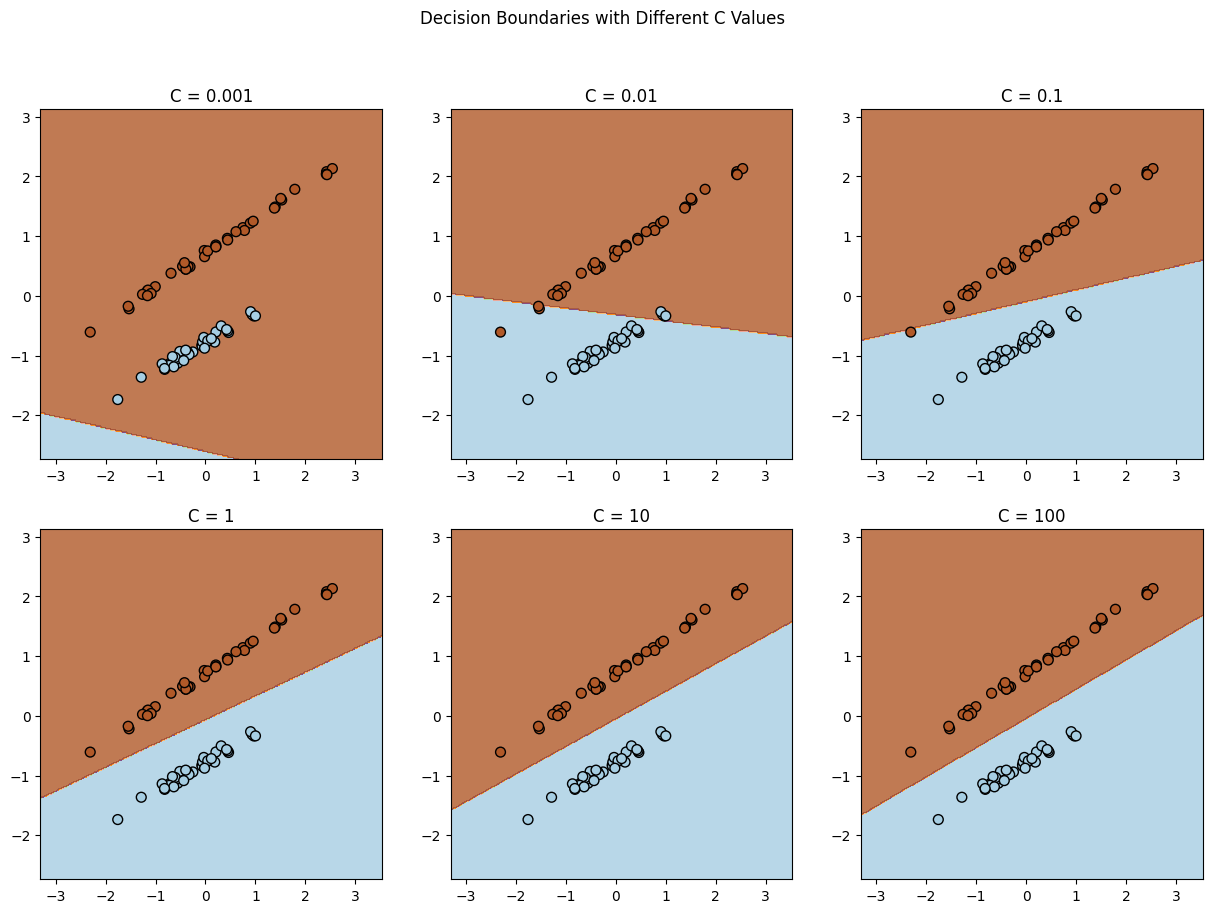

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Values of C to be used
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Decision Boundaries with Different C Values')

# Plot decision boundaries for different C values
for i, C in enumerate(C_values):
    # Create logistic regression model
    clf = LogisticRegression(C=C, random_state=42)

    # Fit the model
    clf.fit(X_train, y_train)

    # Plot decision boundary
    ax = axes[i // 3, i % 3]
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)
    ax.set_title(f'C = {C}')

plt.show()


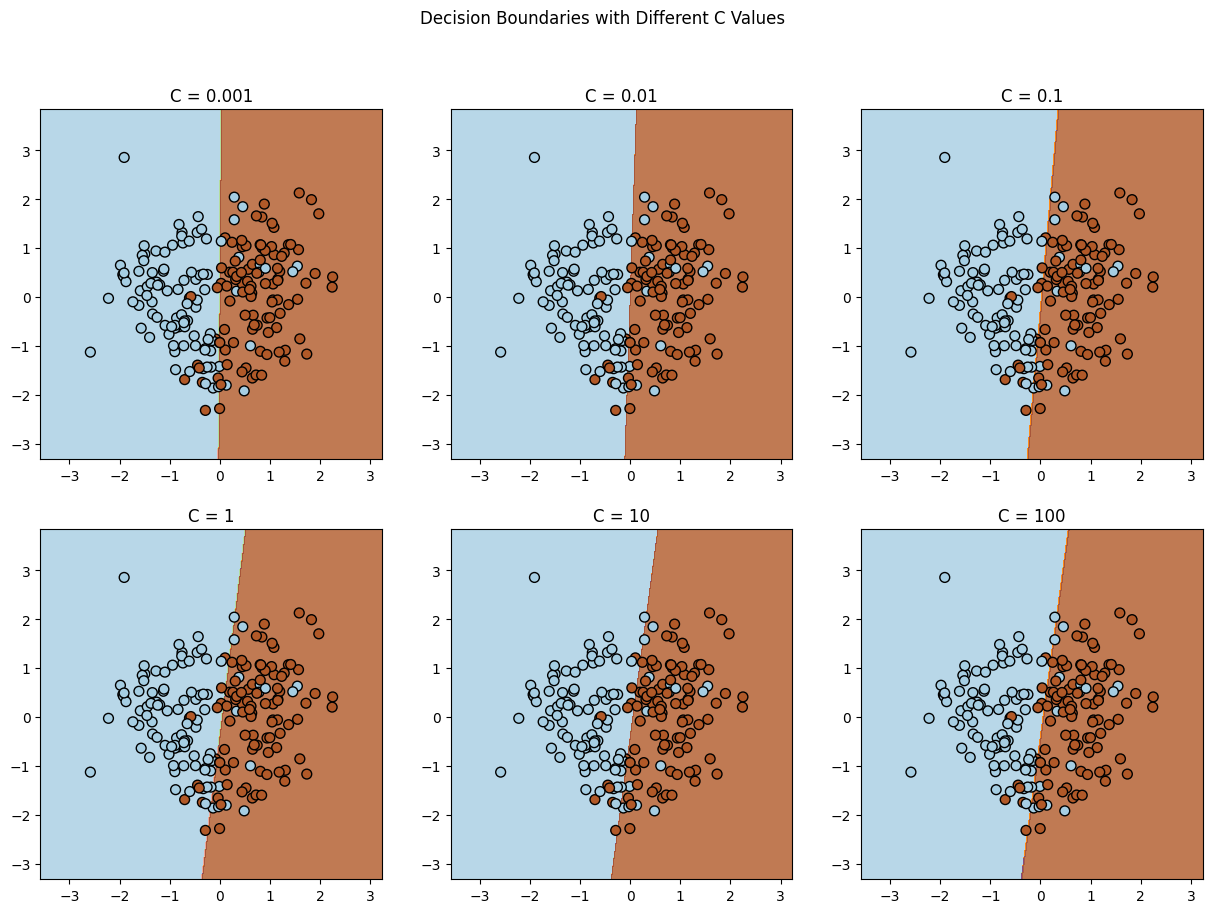

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Create a more complex synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Values of C to be used
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Decision Boundaries with Different C Values')

# Plot decision boundaries for different C values
for i, C in enumerate(C_values):
    # Create logistic regression model
    clf = LogisticRegression(C=C, random_state=42)

    # Fit the model
    clf.fit(X, y)

    # Plot decision boundary
    ax = axes[i // 3, i % 3]
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)
    ax.set_title(f'C = {C}')

plt.show()


# polynomial feature and C

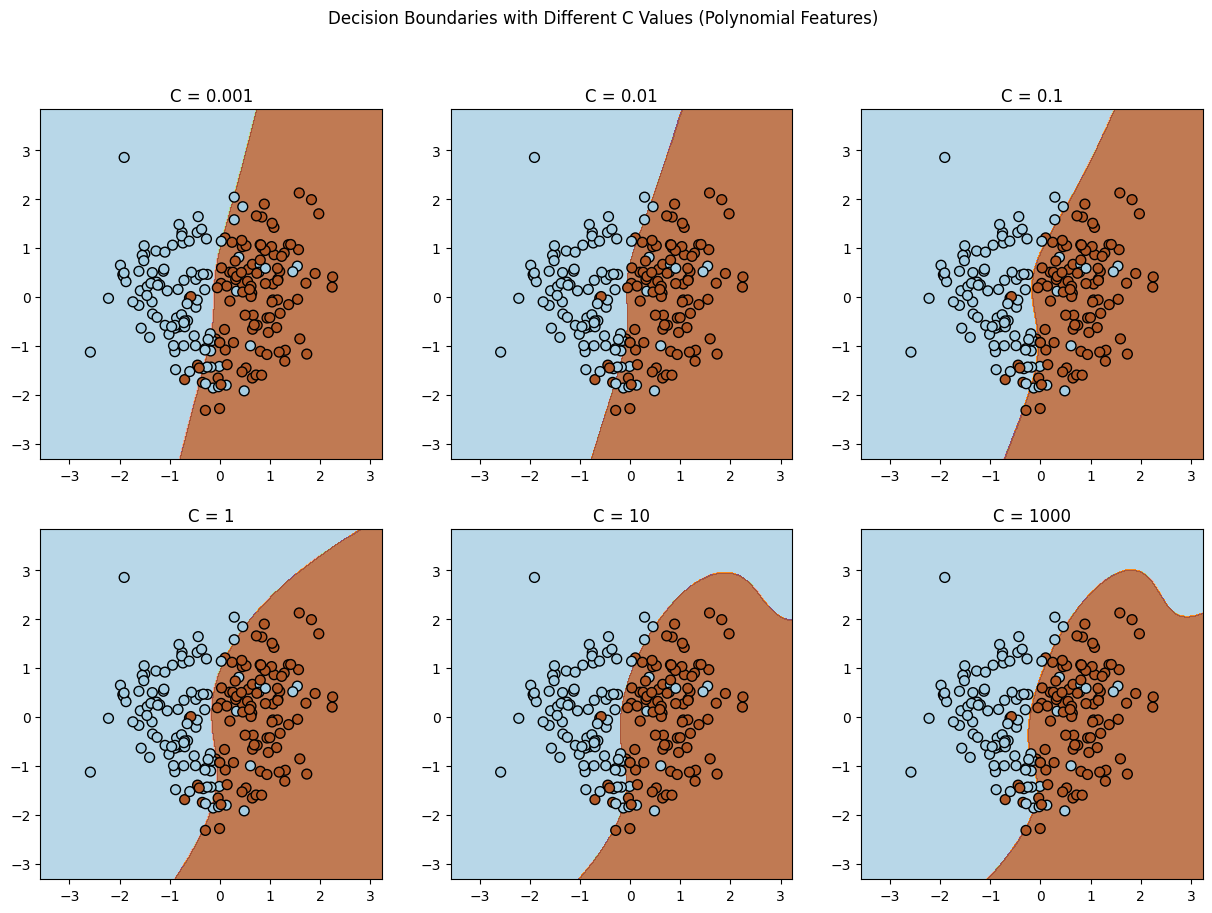

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import make_classification

# Create a more complex synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_clusters_per_class=2, n_redundant=0, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add polynomial features
poly = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_poly = poly.fit_transform(X)

# Values of C to be used
C_values = [0.001, 0.01, 0.1, 1, 10, 1000]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Decision Boundaries with Different C Values (Polynomial Features)')

# Plot decision boundaries for different C values
for i, C in enumerate(C_values):
    # Create logistic regression model
    clf = LogisticRegression(C=C, random_state=42)

    # Fit the model with polynomial features
    clf.fit(X_poly, y)

    # Plot decision boundary
    ax = axes[i // 3, i % 3]
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Transform meshgrid points with polynomial features
    mesh_points = poly.transform(np.c_[xx.ravel(), yy.ravel()])
    
    Z = clf.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)
    ax.set_title(f'C = {C}')

plt.show()


In [2]:
X_poly

array([[ 1.        ,  1.30613292, -1.08798863, ..., -1.85609034,
         1.54609469, -1.28787309],
       [ 1.        ,  1.18345778, -1.12583091, ..., -1.57680759,
         1.50002709, -1.42698531],
       [ 1.        , -0.89752284, -1.11687373, ..., -0.89969456,
        -1.11957621, -1.39319603],
       ...,
       [ 1.        ,  1.45538396,  0.51838765, ...,  1.0980189 ,
         0.39109916,  0.13930412],
       [ 1.        ,  1.41351512,  1.07607937, ...,  2.15003349,
         1.63677534,  1.24604268],
       [ 1.        , -0.6513737 , -0.13560205, ..., -0.05753428,
        -0.0119774 , -0.00249344]])